In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import math
import glob
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
data_446 = pd.read_csv('/root/jupyter/DS_competition/科大讯飞2022电商销量预测挑战赛/xfdata/数据集/446.csv')

In [3]:
data_446

,商品id,时间,总销量,浏览量,抖音转化率,视频个数,直播个数,直播销量,视频销量,视频达人,直播达人
0,【老爹年货节宠粉 实发8包】岐山天缘醋粉270g*6袋 速食粗粮小吃,2021-07-08 16:00:00,331,1245,0.265863,0,3,331,0,0,2
1,【老爹年货节宠粉 实发8包】岐山天缘醋粉270g*6袋 速食粗粮小吃,2021-07-09 16:00:00,1,445,0.002247,0,2,1,0,1,2
2,【老爹年货节宠粉 实发8包】岐山天缘醋粉270g*6袋 速食粗粮小吃,2021-07-10 16:00:00,0,423,0.000000,0,1,0,0,0,1
3,【老爹年货节宠粉 实发8包】岐山天缘醋粉270g*6袋 速食粗粮小吃,2021-07-11 16:00:00,0,425,0.000000,0,1,0,0,0,1
4,【老爹年货节宠粉 实发8包】岐山天缘醋粉270g*6袋 速食粗粮小吃,2021-07-12 16:00:00,2635,6937,0.379847,0,2,2635,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
168,【老爹年货节宠粉 实发8包】岐山天缘醋粉270g*6袋 速食粗粮小吃,2021-12-23 16:00:00,1,12,0.083333,0,0,0,1,1,0
169,【老爹年货节宠粉 实发8包】岐山天缘醋粉270g*6袋 速食粗粮小吃,2021-12-24 16:00:00,0,14,0.000000,0,0,0,0,0,0
170,【老爹年货节宠粉 实发8包】岐山天缘醋粉270g*6袋 速食粗粮小吃,2021-12-25 16:00:00,4,14,0.285714,0,0,0,4,0,0
171,【老爹年货节宠粉 实发8包】岐山天缘醋粉270g*6袋 速食粗粮小吃,2021-12-26 16:00:00,2,16,0.125000,0,0,0,2,0,0


In [3]:
data_path = glob.glob('/root/jupyter/DS_competition/科大讯飞2022电商销量预测挑战赛/xfdata/数据集/*')

In [4]:
df_all = pd.DataFrame()
for dp in data_path:
	if len(df_all)==0:
		df_all = pd.read_csv(dp)
	else:
		dt = pd.read_csv(dp)
		df_all = pd.concat([df_all,dt],axis=0)

In [6]:
#缺失值
df_all.isnull().sum().sum()

0

845.csv


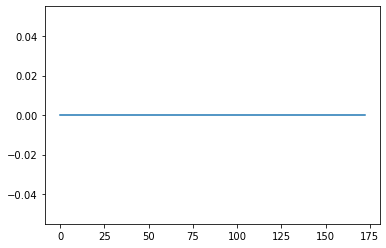

975.csv


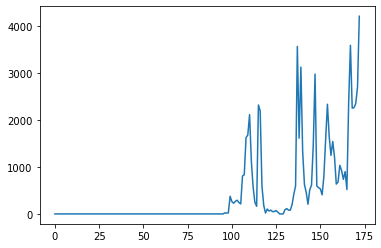

361.csv


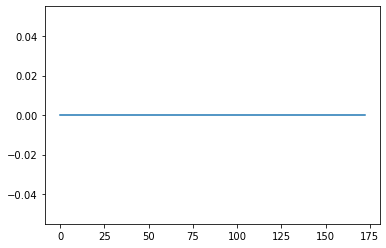

174.csv


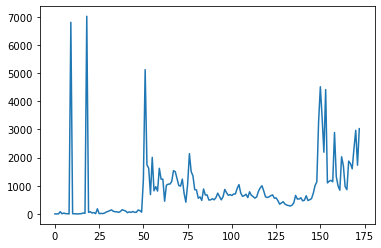

812.csv


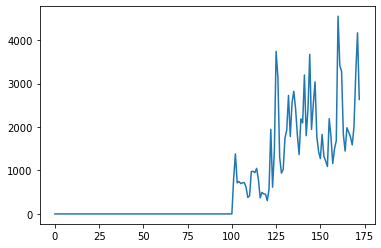

263.csv


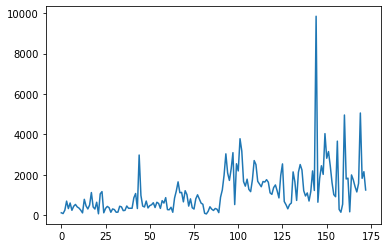

1049.csv


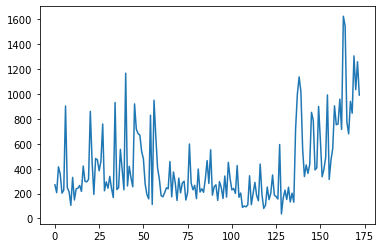

1142.csv


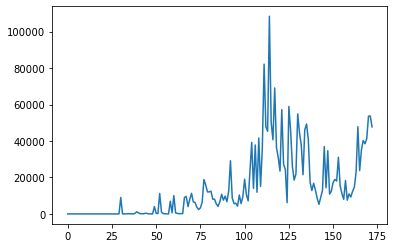

1168.csv


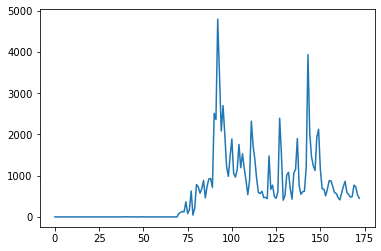

597.csv


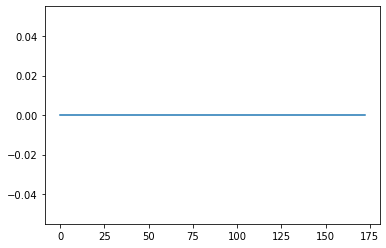

1355.csv


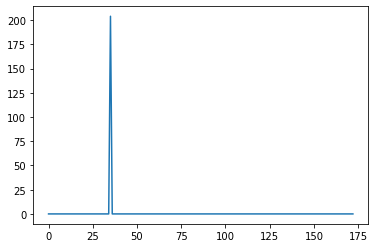

568.csv


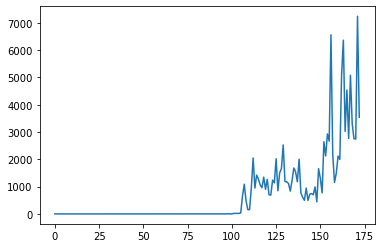

347.csv


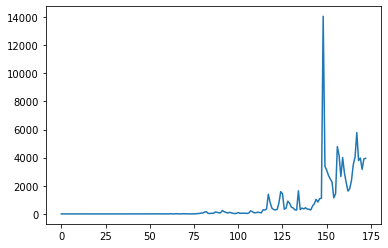

605.csv


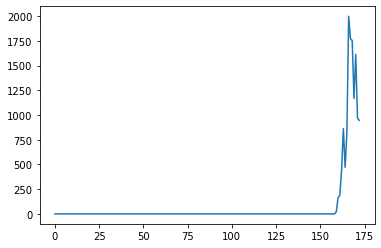

635.csv


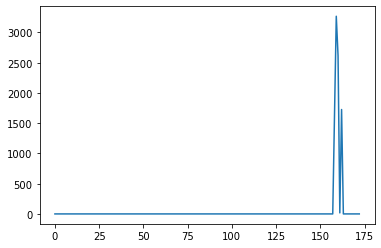

1203.csv


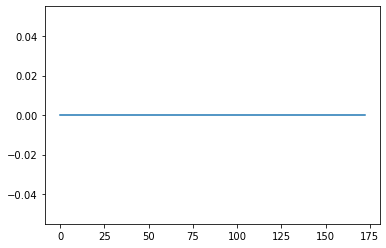

1215.csv


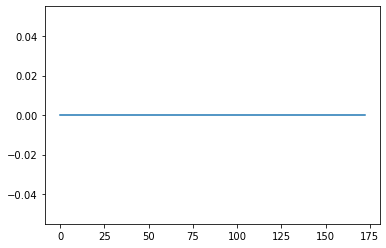

1300.csv


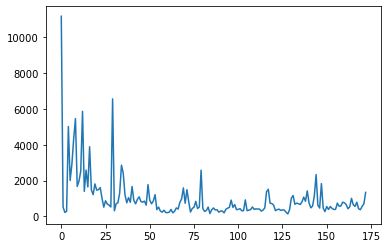

85.csv


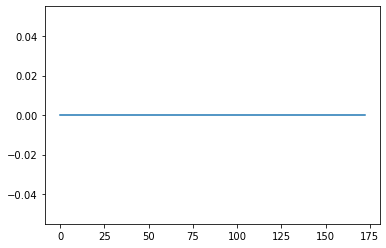

757.csv


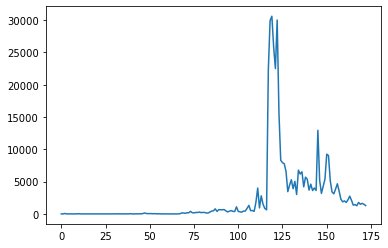

229.csv


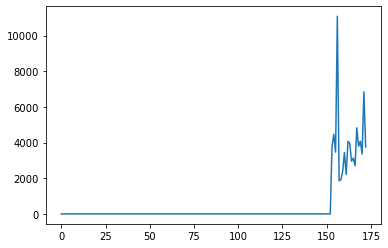

434.csv


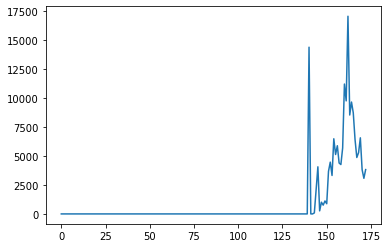

129.csv


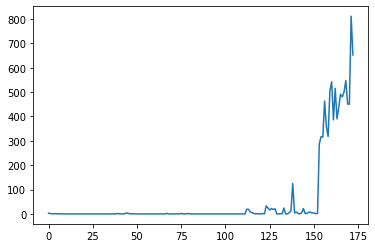

1346.csv


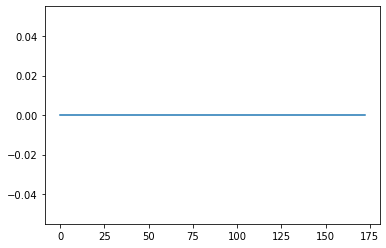

143.csv


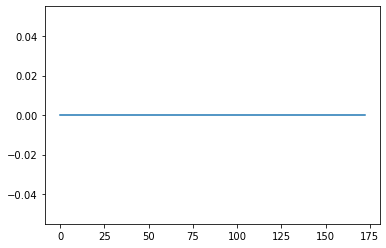

817.csv


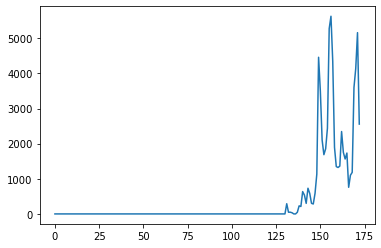

1173.csv


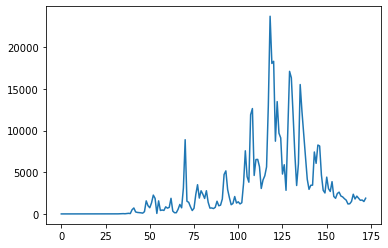

1105.csv


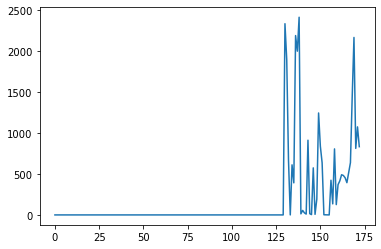

408.csv


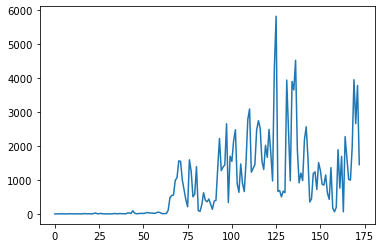

77.csv


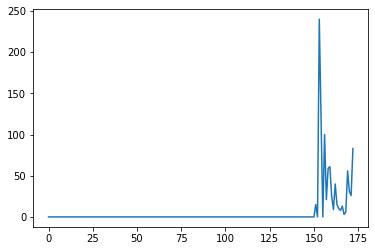

747.csv


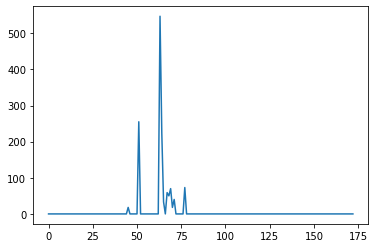

63.csv


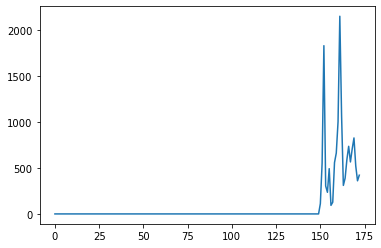

668.csv


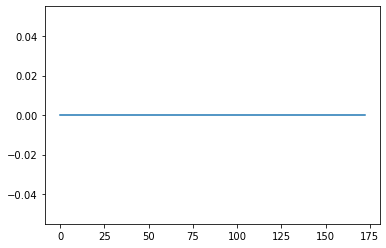

1437.csv


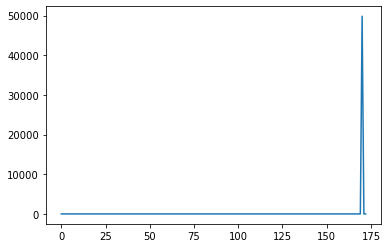

332.csv


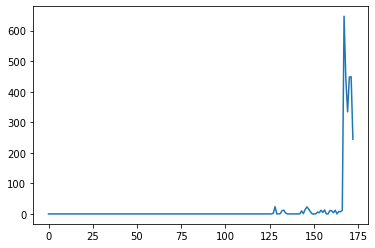

1326.csv


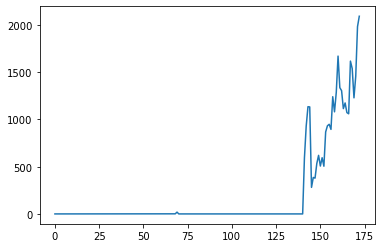

547.csv


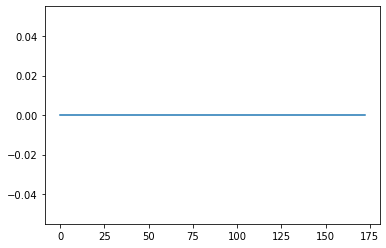

104.csv


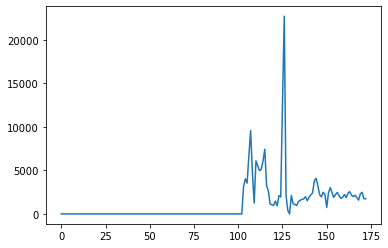

662.csv


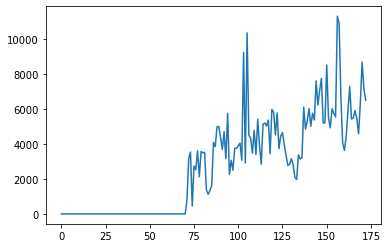

1319.csv


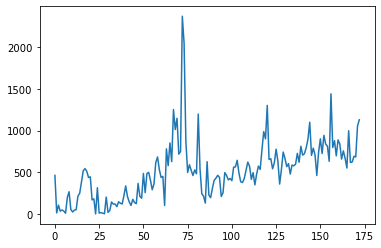

484.csv


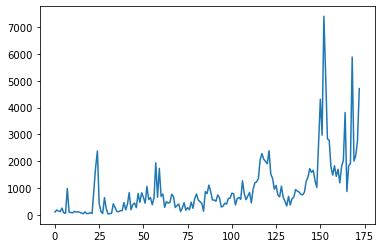

594.csv


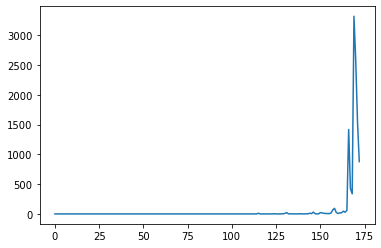

84.csv


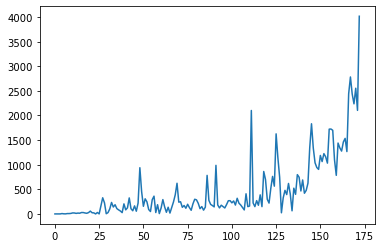

1324.csv


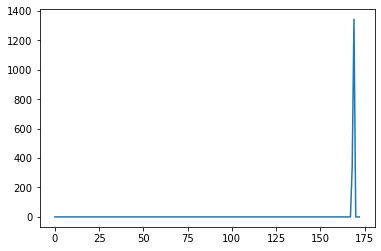

308.csv


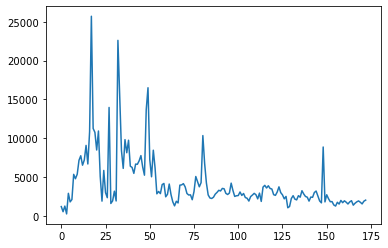

257.csv


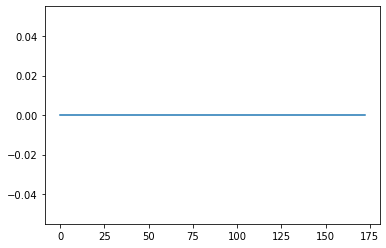

931.csv


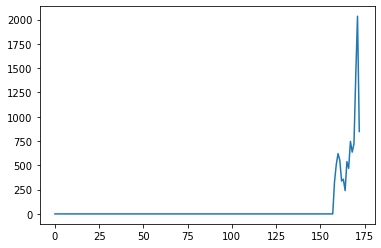

119.csv


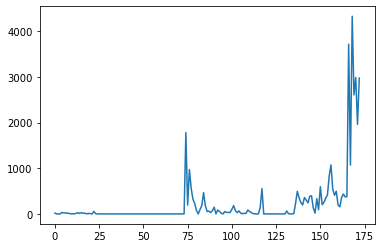

1007.csv


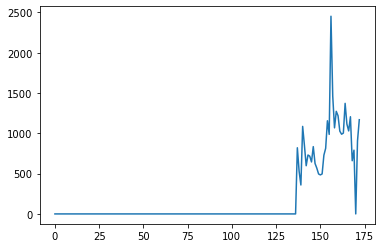

134.csv


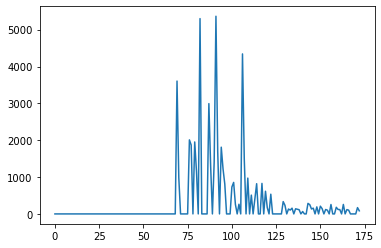

377.csv


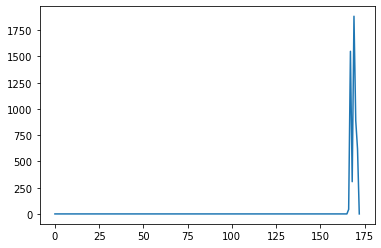

1258.csv


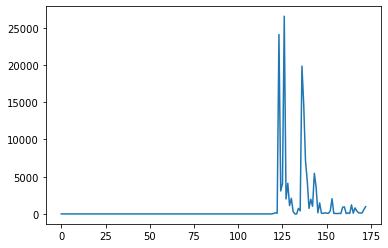

1031.csv


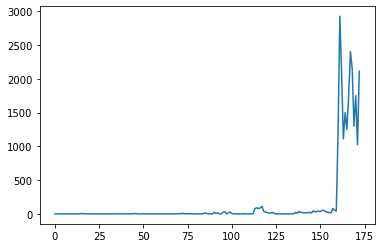

1183.csv


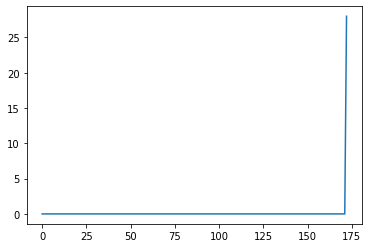

1399.csv


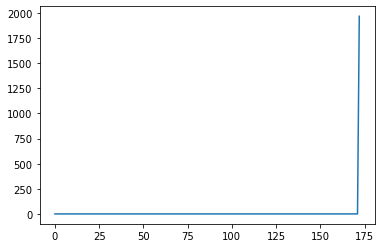

1434.csv


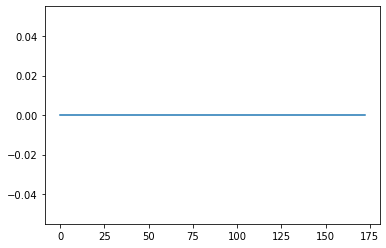

1186.csv


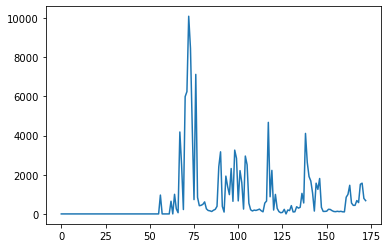

1395.csv


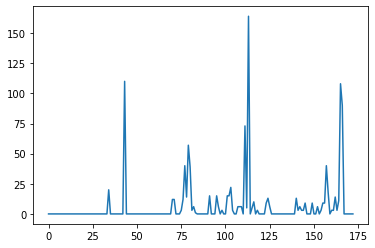

464.csv


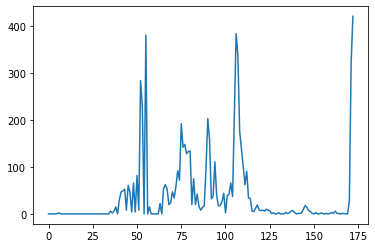

925.csv


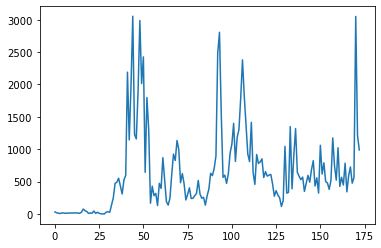

879.csv


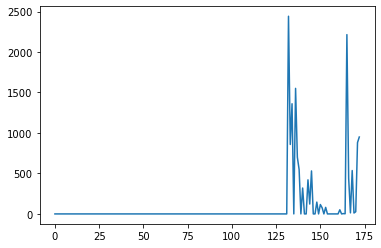

436.csv


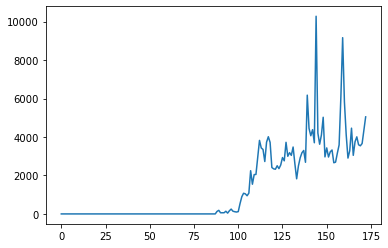

1342.csv


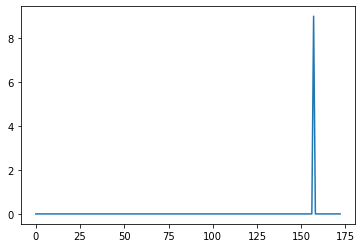

344.csv


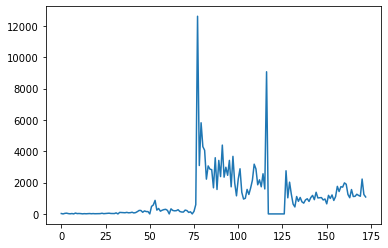

480.csv


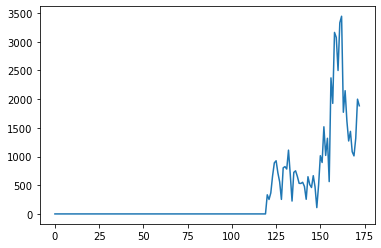

954.csv


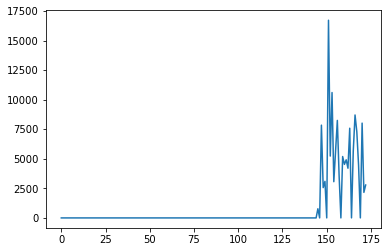

978.csv


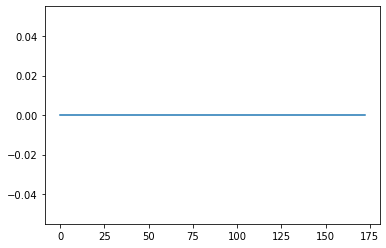

1409.csv


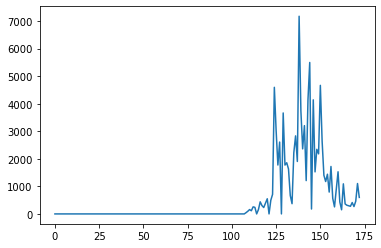

151.csv


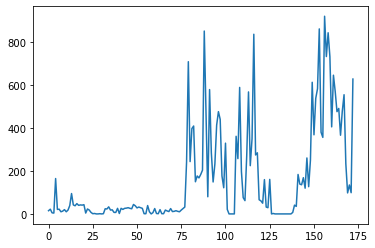

837.csv


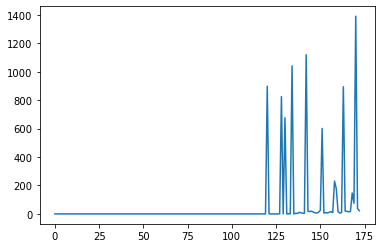

821.csv


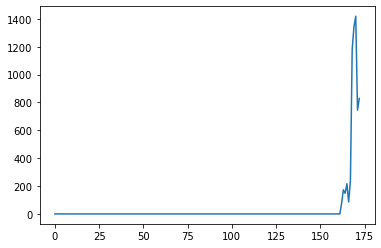

1306.csv


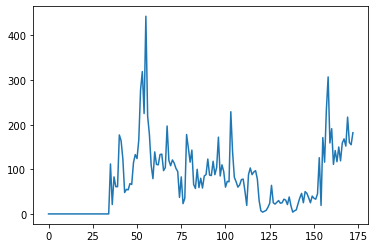

1442.csv


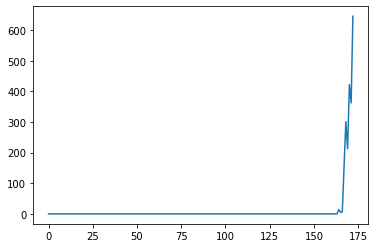

1293.csv


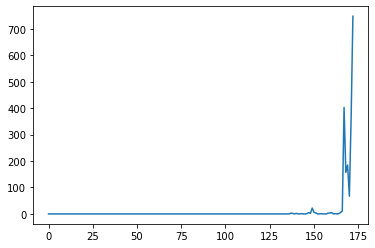

316.csv


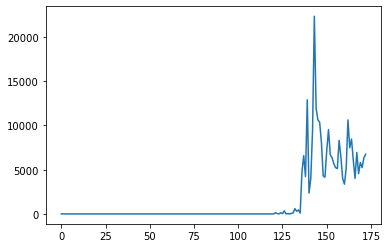

372.csv


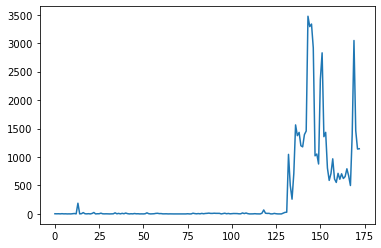

1016.csv


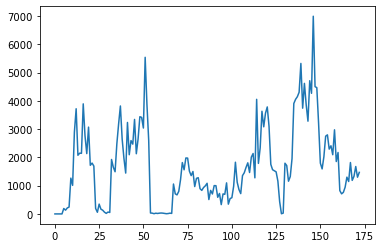

187.csv


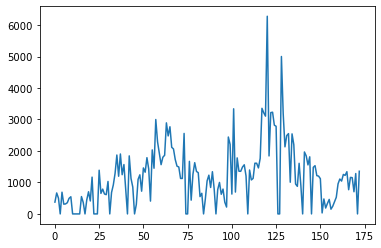

177.csv


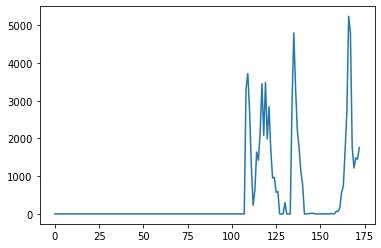

13.csv


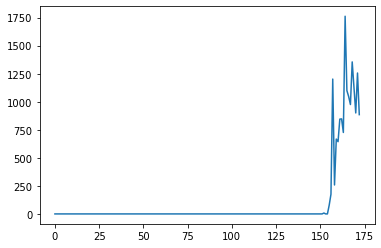

398.csv


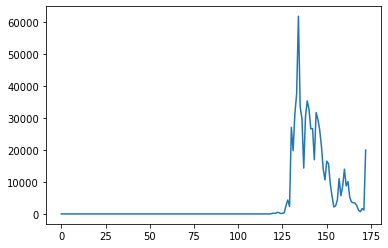

995.csv


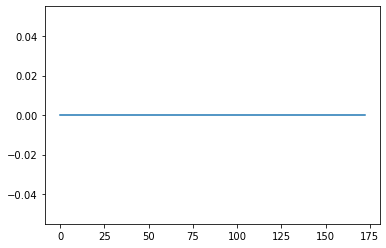

687.csv


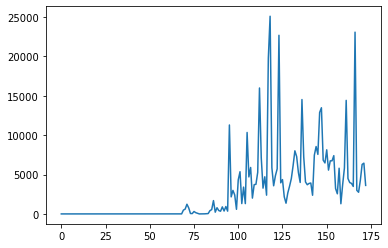

733.csv


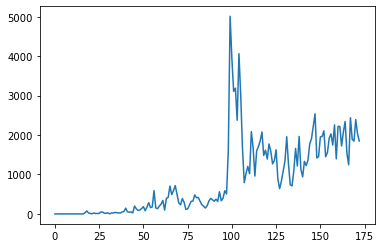

330.csv


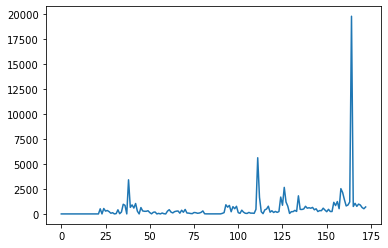

1084.csv


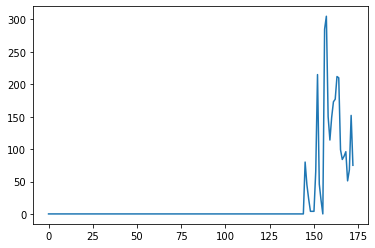

753.csv


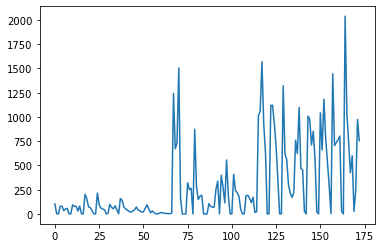

1378.csv


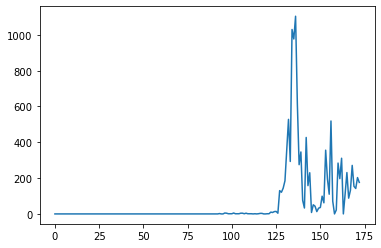

1160.csv


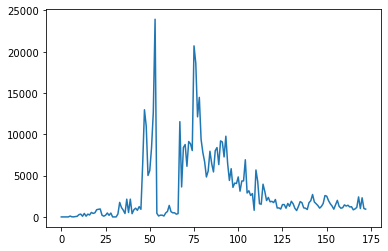

96.csv


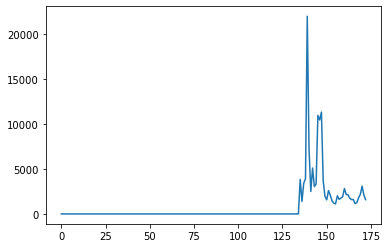

1230.csv


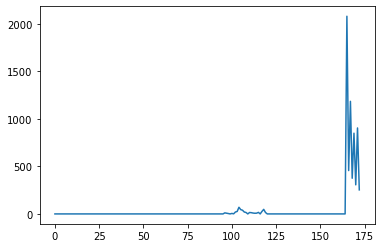

1403.csv


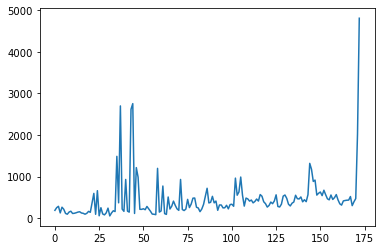

1400.csv


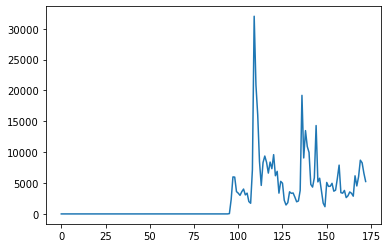

346.csv


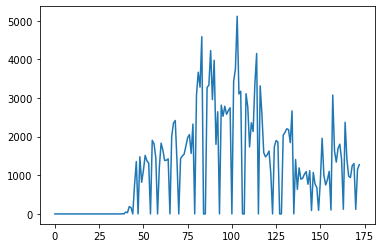

640.csv


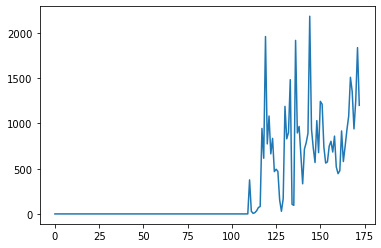

914.csv


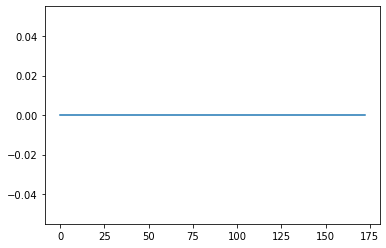

457.csv


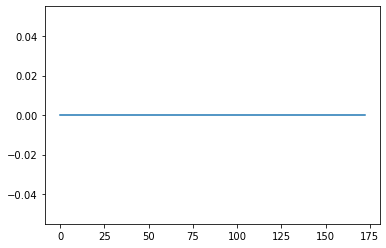

207.csv


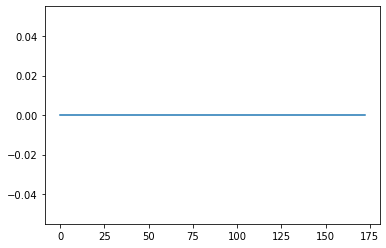

1241.csv


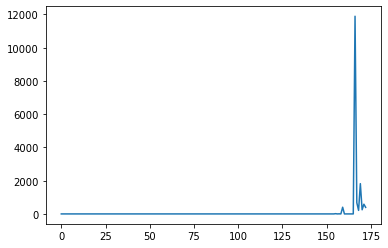

788.csv


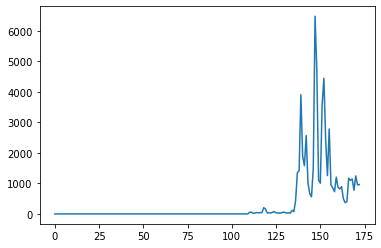

In [7]:
for dp in range(100,200):
	df = pd.read_csv(data_path[dp])
	x=np.arange(0,df.shape[0])
	y=df['总销量']
	print(data_path[dp].split('/')[-1])
	plt.plot(x,y)
	plt.show()

In [8]:
s_all = df_all.groupby(['时间']).agg({'总销量':'mean'}).reset_index().rename(columns={'总销量':'mean'})

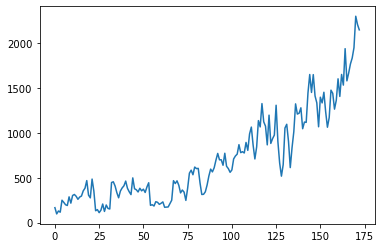

In [9]:
x=np.arange(0,s_all.shape[0])
y=s_all['mean']
plt.plot(x,y)
plt.show()

In [10]:
s_all['log销量'] = list(map(lambda x : x if x==np.NAN else math.log(x+1,2),s_all['mean']))

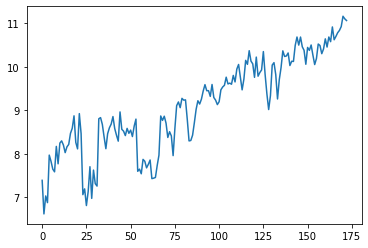

In [11]:
x=np.arange(0,s_all.shape[0])
y=s_all['log销量']
plt.plot(x,y)
plt.show()

In [7]:
df_all[df_all['总销量']>100000]

,商品id,时间,总销量,浏览量,抖音转化率,视频个数,直播个数,直播销量,视频销量,视频达人,直播达人
117,火郎牌重庆牛油老火锅底料50g一袋一人份家用麻辣正宗牛油小包装,2021-11-02 16:00:00,100983,20848,1.000000,0,39,100983,0,16,26
114,【非遗】十吉重庆老火锅底料50g小包装一人份牛油麻辣火锅调料,2021-10-30 16:00:00,108432,66818,1.000000,15,40,39895,68537,55,32
117,东方海盐 精制海盐400g*7袋炒菜煲汤提鲜,2021-11-02 16:00:00,111605,88193,1.000000,58,333,1185,110420,632,234
121,10袋起拍-重庆特色佳仙老火锅底料50g手工全型麻辣烫底料懒人小袋,2021-11-06 16:00:00,130737,0,0.000000,11,422,22680,108057,0,315
130,10袋起拍-重庆特色佳仙老火锅底料50g手工全型麻辣烫底料懒人小袋,2021-11-15 16:00:00,107457,41326,1.000000,30,544,73085,34372,317,410
139,10袋起拍-重庆特色佳仙老火锅底料50g手工全型麻辣烫底料懒人小袋,2021-11-24 16:00:00,132847,28025,1.000000,29,734,132847,0,331,520
140,10袋起拍-重庆特色佳仙老火锅底料50g手工全型麻辣烫底料懒人小袋,2021-11-25 16:00:00,114556,76446,1.000000,25,698,114556,0,963,510
141,10袋起拍-重庆特色佳仙老火锅底料50g手工全型麻辣烫底料懒人小袋,2021-11-26 16:00:00,128375,81511,1.000000,28,659,128375,0,939,487
143,10袋起拍-重庆特色佳仙老火锅底料50g手工全型麻辣烫底料懒人小袋,2021-11-28 16:00:00,123101,73031,1.000000,28,752,123101,0,993,542
151,10袋起拍-重庆特色佳仙老火锅底料50g手工全型麻辣烫底料懒人小袋,2021-12-06 16:00:00,107897,52903,1.000000,16,909,107897,0,1340,677


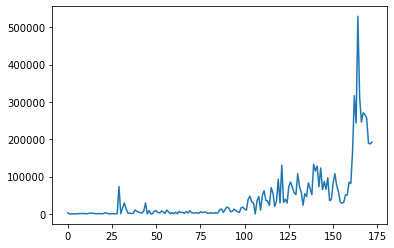

In [13]:
plt.plot(np.arange(173),df_all[df_all['商品id']=='10袋起拍-重庆特色佳仙老火锅底料50g手工全型麻辣烫底料懒人小袋']['总销量'])

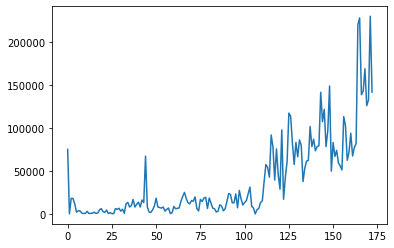

In [14]:
plt.plot(np.arange(173),df_all[df_all['商品id']=='10袋起拍 重庆锅主老火锅底料50g独立小包装单人份麻辣烫底料']['总销量'])

In [15]:
df_all['总销量'].quantile(q=0.5,interpolation="linear")

0.0

In [5]:
df_all.describe()

,总销量,浏览量,抖音转化率,视频个数,直播个数,直播销量,视频销量,视频达人,直播达人
count,250677.000000,250677.000000,250677.000000,250677.000000,250677.000000,250677.000000,250677.000000,250677.000000,250677.000000
mean,711.319614,2087.386729,0.070337,2.561045,53.619383,509.914675,201.404939,35.786857,38.389741
std,3818.314029,9065.893416,0.165515,12.283299,217.995573,3212.997419,1554.125751,189.917892,157.572326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,178.000000,96.000000,0.032841,0.000000,5.000000,80.000000,0.000000,0.000000,3.000000
max,529326.000000,642428.000000,1.000000,573.000000,7953.000000,358578.000000,170748.000000,9761.000000,5558.000000
